In [1]:
# The libriaries for this experiment were imported into the python enviroment
import os
from numba import jit

import numpy as np
import scipy as sp
import pandas as pd

from dask.distributed import Client, LocalCluster
import dask.delayed
import dask.dataframe as dd
from  dask_ml.wrappers import Incremental
from dask import array as da


from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction import stop_words
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import RobustScaler

import statsmodels.api as sm

from gensim.models.word2vec import Word2Vec
from gensim.sklearn_api import W2VTransformer

import holoviews as hv
import hvplot.pandas

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
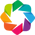

In [2]:
hv.extension('bokeh')

# Start Cluster

In [3]:
# This experiment make use of Dask for parallelized data preprocessing \\
#  and allow for distributed computation accross a cluster \\
#  this code chunk can be changed depending on the computing environment \\
#  for distributed computation
cluster = LocalCluster(n_workers=1, threads_per_worker=8)

In [5]:
client = Client(cluster)

client

<Client: scheduler='tcp://127.0.0.1:44439' processes=1 cores=8>

# Import datasets

In [6]:
# Scraped news data on South African companies was imported and cleaned \\
#  stop-words were removed and data data grouped by day
text_path = os.path.join('..','scraper','News','*.csv')
text = dd.read_csv(text_path).dropna()

text.date = text.date.astype('M8[D]')

text.text = text.text.str.lower().str.replace('[^a-z]',' ').str.replace(f"({' | '.join(ENGLISH_STOP_WORDS)})",' ').apply(lambda x: f' {x} ', meta='U').astype('U')

text.company = text.company.apply(lambda x: f' {x} ', meta='U')

text.source = text.source.apply(lambda x: f' {x} ', meta='U')

text = text.groupby('date').sum().persist()

In [7]:
# Bloomberg metasata descriptions of South African companies was imported and cleaned
meta_path = os.path.join('..','data','Bloomberg_Meta.csv')
meta = dd.read_csv(meta_path)

meta = meta.where(meta.CODE.str.endswith('SJ Equity')).dropna()

meta.DESCRIPTION = meta.DESCRIPTION.str.lower().str.replace('[^a-z]',' ').str.replace(f"({' | '.join(ENGLISH_STOP_WORDS)})",' ').astype('U')

meta.CODE = meta.CODE.str.replace(' SJ Equity','')

In [8]:
# Price (Total Index Return) data was sourced from Reuters \\
#  over a 15 year period, ending in May 2018

price_path = os.path.join('..','data','JSE_RI_2003_2008.csv')
price = dd.read_csv(price_path,  sep=';', decimal=b',', 
                    skiprows=1, dtype={'R:ISAJ(RI)': 'float64',
                                       'R:PPEJ(RI)': 'float64',
                                       'R:ZCIJ(RI)': 'float64'})

price = price.drop(labels=price.columns[price.columns.str.startswith('Unnamed:')], axis=1)

price.Code = price.Code.astype(np.datetime64)

In [9]:
# To ensure price allignment  and attribution of news to market days \\
#  news articles grouped by days were then join against filled price data days \\
#  this fills in the gaps of non-trading days
pandas_date_range = dask.delayed(lambda x,y: pd.DataFrame(\
                        pd.date_range(start=x, end=y, periods=None, \
                            freq='D', tz=None, normalize=False, name='date', \
                                      closed=None)))(price.Code.astype(str).min(),
                                                     price.Code.astype(str).max())

date_range = dd.from_delayed(pandas_date_range)
text = date_range.join(text, on='date', how='left').fillna('')

In [53]:
# Text is grouped for the sake of backtesting into {n} day windows \\
#  for the sake of testing these windows are set to 10 day windows

text.text = dd.concat([text.text.shift(i) for i in range(10)], axis=1).fillna('').sum(axis=1, skipna=False)

/home/marcussky/.conda/envs/tulip/lib/python3.6/site-packages/dask/dataframe/multi.py:602: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indexes of each dataframes are 
aligned. This assumption is not generally safe.
  warn("Concatenating dataframes with unknown divisions.\n"


In [54]:
# Article windows from non-tradings days are disregarded \
#  for the sake of backtesting as no price exists for them
text = price.loc[:,['Code']].merge(text, how='left', left_on='Code', right_on='date')

In [55]:
# Join text and price \
# Then create a price starts with...
price = price.drop('Code', axis=1).dropna().persist()

price.columns = price.columns.str.replace('J\(RI\)','').str.replace('R:','')

In [56]:
# Company descriptions and Price data were sorted and filtered \\
#  to ensure data existed accross both datasets
meta = meta.where(meta.CODE.isin(price.columns)).dropna()

price = dask.delayed(lambda x, y: x[y.values.tolist()])(price, meta.CODE)

# Pipeline

Make Portfolios

In [13]:
# Random evenly sized portfolios were sampled from the market
def RandomPortolio(stocks=174, size=10, samples=5000, p=None):
    E = np.zeros((stocks,samples), dtype=int)
    
    for j in range(samples):
        E[ np.random.choice(stocks, size, replace=False, p=None) , j] = 1
    
    return E

In [14]:
# This experiments risk metric was compared against \\
#  a rolling 90 day portfolio volatility
stocks = dask.delayed(len)(price.columns)

P = dask.delayed(RandomPortolio, pure=True)(stocks=stocks, size=5, samples=10000).persist()

price = ((price.shift(-1) - price)/price)

portfolios = dask.delayed(pd.DataFrame.dot)(price, P)

portfolios_vars = portfolios.dropna().loc[::-1].rolling(30).apply(lambda x: np.var(np.cumprod(x))).loc[::-1].persist()

Predict Portfolio Distances

In [15]:
# Share embeddings were computed as a weighted average \\
#  of their word embedding using their L2 TFIDF weighting
tfidf = dask.delayed(TfidfVectorizer().fit)(meta.DESCRIPTION)

idf_sparse = dask.delayed(tfidf.transform)(meta.DESCRIPTION)
idf_dense= dask.delayed(sp.sparse.csr_matrix.todense)(idf_sparse)
idf_transform = dask.delayed(pd.DataFrame)(data=idf_dense, dtype='f8')
idf = dd.from_delayed(idf_transform, prefix='from-delayed')

features = dask.delayed(lambda x: x.get_feature_names())(tfidf)
frame = dask.delayed(pd.DataFrame)(data=features, columns=['vocab'], dtype='U')
vocab = dd.from_delayed(frame, prefix='from-delayed')

In [16]:
########## This is where the function starts ###############

In [17]:
# A word2vec model was computed accross our corpus

text.text = text.text.astype('U')
meta.DESCRIPTION = meta.DESCRIPTION.astype('U')

docs = dd.concat([text.text.loc[-100], meta.DESCRIPTION], axis=0)

word2vec = dask.delayed(Word2Vec)(sentences=docs.str.split(), min_count=1, workers=np.min( np.array( \
                                                                                                   list(client.ncores().values())
                                                                                                  ))-2)

# This weighted average was computed using the dot product \\
#  between the tfidf weighting and the models embeddings
vectors_from = dask.delayed(lambda x: [x.wv.vectors, x.wv.vocab.keys()])(word2vec)
vectors_frame = dask.delayed(pd.DataFrame)(data=vectors_from[0], index=vectors_from[1])

vectors = dd.from_delayed(vectors_frame)

lookup = vocab.merge(vectors, how='left', left_on='vocab', right_index=True).drop('vocab', axis=1)


# Euclidean distance between share embeddings in the portfolio \\
#  was used as the metric for calculating portfolio risk
entity_vectors = dask.delayed(pd.DataFrame.dot)(idf,lookup)

entity_distances = dask.delayed(euclidean_distances)(entity_vectors)

entity_distances_delayed = dask.delayed(pd.DataFrame)(data=entity_distances, dtype='f8')
entity_distances_frame= dd.from_delayed(entity_distances_delayed, prefix='from-delayed').persist()

portfolios_distances = dask.delayed(pd.DataFrame.dot)(entity_distances_frame,P).sum(0)

In [18]:
########### This is where the portfolio ends #############

___

# Covariance and OLS Regression Calculation

In [19]:
# The portfolio risk metric was scaled using a robust scaler \\
#  using the 0.25 IQR's this is done to improve robustness \\
#  and interpretability of the analysis \\
scaled_K = -(portfolios_distances - portfolios_distances.quantile(0.5))/(portfolios_distances.quantile(0.75) - portfolios_distances.quantile(0.25))

In [30]:
# The portfolio volatility was scaled using a robust scaler \\
#  using the 0.25 IQR's this is done to improve robustness \\
#  and interpretability of the analysis \\
portfolio_select = portfolios_vars.dropna().iloc[-1,:]
scaled_V = (portfolio_select - portfolio_select.quantile(0.5))/(portfolio_select.quantile(0.75) - portfolio_select.quantile(0.25))

In [31]:
# The covariance between portfolio variance \\
#  and our metrix was computed
risk_covariance = scaled_K.cov(scaled_V)
risk_covariance.compute()

0.01366228463414404

In [32]:
# A visual of the task graph was persisted to disk as a .png image
risk_covariance.visualize(filename='risk_covariance_taskgraph', format='png');

In [33]:
# Our scaled metric and portfolio risk \\
#  were assigned to x and y variables 
X = scaled_K.compute()
y = scaled_V.compute()

In [34]:
pd.Series(X, name='Risk Metric').hvplot.kde() * pd.Series(y, name='postfolio var').hvplot.kde()

:Overlay
   .Distribution.I  :Distribution   [Risk Metric]   (Density)
   .Distribution.II :Distribution   [postfolio var]   (Density)

In [35]:
# OLS Regression was used to test for a linear relaitionship \\
#  between our metric and portfolio risk \\
#  this is used in order to do an analysis of the covariance \\
#  between the two variables
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   3884   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.657
Date:                Sat, 11 Aug 2018   Prob (F-statistic):             0.0559
Time:                        12:09:41   Log-Likelihood:                -11928.
No. Observations:               10000   AIC:                         2.386e+04
Df Residuals:                    9998   BIC:                         2.388e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0728      0.008     -9.063      0.0

In [36]:
pd.concat({'Risk Metric':X, 'Portfolio Var':y}, axis=1).hvplot.scatter(x='Risk Metric', y='Portfolio Var').options(width=500, size=3, alpha=0.2).hist() * \
    hv.Curve((X, est2.params[0]*X+est2.params[1])) + \
    pd.concat({'Risk Metric':X, 'error':y-(est2.params[0]*X+est2.params[1])}, axis=1).hvplot.scatter(x='Risk Metric', y='error', c='orange').options(width=500, size=3, alpha=0.2)

:Layout
   .AdjointLayout.I :AdjointLayout
      :Overlay
         .Scatter.I :Scatter   [Risk Metric]   (Portfolio Var)
         .Curve.I   :Curve   [x]   (y)
      :Histogram   [Portfolio Var]   (Portfolio Var_frequency)
   .Scatter.I       :Scatter   [Risk Metric]   (error)

In [37]:
hv.Bivariate((X, y)).options(width=600, height=600)

:Bivariate   [x,y]   (Density)

In [38]:
gamma_model = sm.GLM(y, X2, family=sm.families.Gamma(link=sm.genmod.families.links.identity))
gamma_model2 = gamma_model.fit()
print(gamma_model2.summary())

/home/marcussky/.conda/envs/tulip/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   3884   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                   Gamma   Df Model:                            1
Link Function:               identity   Scale:                          180.38
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 11 Aug 2018   Deviance:                   3.4221e+05
Time:                        12:09:54   Pearson chi2:                 1.80e+06
No. Iterations:                   100   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0692      0.009     -7.330      0.000      -0.088      -0.051
0              0.0272      0.009      2.904      0.0

/home/marcussky/.conda/envs/tulip/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:733: RuntimeWarning: invalid value encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


In [39]:
pd.concat({'Risk Metric':X, 'Portfolio Var':y}, axis=1).hvplot.scatter(x='Risk Metric', y='Portfolio Var').options(width=500, size=3, alpha=0.2).hist() * \
    hv.Curve((X, gamma_model2.params[0]*X+gamma_model2.params[1])) + \
    pd.concat({'Risk Metric':X, 'error':y-(gamma_model2.params[0]*X+gamma_model2.params[1])}, axis=1).hvplot.scatter(x='Risk Metric', y='error', c='orange').options(width=500, size=3, alpha=0.2)

:Layout
   .AdjointLayout.I :AdjointLayout
      :Overlay
         .Scatter.I :Scatter   [Risk Metric]   (Portfolio Var)
         .Curve.I   :Curve   [x]   (y)
      :Histogram   [Portfolio Var]   (Portfolio Var_frequency)
   .Scatter.I       :Scatter   [Risk Metric]   (error)